# Aula 6: Classificação: Knn, Regressão Logistica, Naive Bayes

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2022.

<hr>

### Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 - Repita todos os passos acima para a base de dados BreastCancer.

In [ ]:
import pandas as pd
import numpy as np

In [89]:
data = pd.read_csv('../data/BreastCancer.csv')
data = data.dropna()
data = data.drop_duplicates()
data = data.drop('Id', axis=1)
data.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [73]:
y = data['Class'].to_numpy()
x = data.iloc[:, :-1].to_numpy()

In [74]:
# separar validação e treino
idx = np.random.randint(len(x), size=len(x))
n_train = int(len(x)*0.7)
x_train, y_train = x[idx[:n_train]], y[idx[:n_train]]
x_test, y_test = x[idx[n_train:]], y[idx[n_train:]]

# normalização
mean, std = x_train.mean(axis=0), x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
x_train[:5]

array([[-8.23004389e-01,  2.47168754e-03, -7.19691314e-01,
        -6.16763702e-01, -6.08923190e-02, -6.47603467e-01,
        -9.84989552e-01, -5.65088790e-01, -3.35750349e-01],
       [ 1.75229080e+00,  2.00453860e+00,  2.42289610e+00,
         1.32510537e-01,  1.32848172e+00,  1.91121999e+00,
         1.55793168e+00,  2.60619472e+00,  2.74767123e+00],
       [-8.72057631e-02, -3.31206131e-01,  3.27837822e-01,
         1.32510537e-01, -5.24016998e-01, -3.63289750e-01,
        -5.61169346e-01, -5.65088790e-01, -3.35750349e-01],
       [-1.19090370e+00, -6.64883949e-01, -7.19691314e-01,
        -2.42126583e-01, -9.87141678e-01, -7.89760325e-02,
        -9.84989552e-01, -5.65088790e-01,  3.36435554e+00],
       [ 2.80693550e-01, -6.64883949e-01, -7.19691314e-01,
        -2.42126583e-01, -5.24016998e-01, -6.47603467e-01,
        -5.61169346e-01, -5.65088790e-01, -3.35750349e-01]])

In [88]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9408866995073891

In [81]:
y = data['Class'].to_numpy()
x = data.iloc[:, :-1].to_numpy()

[np.unique(x[:, i]) for i in range(x.shape[1])]

[array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10.])]

In [87]:
from sklearn.naive_bayes import CategoricalNB

idx = np.random.randint(len(x), size=len(x))
n_train = int(len(x)*0.7)
x_train, y_train = x[idx[:n_train]], y[idx[:n_train]]
x_test, y_test = x[idx[n_train:]], y[idx[n_train:]]

clf = CategoricalNB()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9507389162561576

2 - Compare os três metodos de classificação para a base winequality-red.

3 - Encontre o melhor k no método k-vizinhos para as bases Iris, BreastCancer e Vehicle.

4 - Considerando a base de dados Vehicle, projete os dados em duas dimensões usando PCA e mostre as regiões de separação como feito acima.

In [27]:
import pandas as pd
data = pd.read_csv('../data/Vehicle.csv')
data = data.dropna()
data = data.drop_duplicates()

In [29]:
data.head()

In [31]:
y = data['Class'].to_numpy()
x = data.iloc[:, :-1].to_numpy()

In [57]:
classes = np.unique(y)
classes_idx = {c: i for i, c in enumerate(classes)}
print(classes)
print(classes_idx)
y_num = np.array([classes_idx[c] for c in y])

['bus' 'opel' 'saab' 'van']
{'bus': 0, 'opel': 1, 'saab': 2, 'van': 3}


In [58]:
# separar validação e treino
idx = np.random.randint(len(x), size=len(x))
n_train = int(len(x)*0.8)
x_train, y_train = x[idx[:n_train]], y_num[idx[:n_train]]
x_test, y_test = x[idx[n_train:]], y_num[idx[n_train:]]

# normalização
mean, std = x_train.mean(axis=0), x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
x_train[:5]

array([[-0.3906248 ,  0.57862868, -0.22265359, -0.76527554, -0.32384737,
         0.4454371 , -0.20739204,  0.19912003, -0.17016207,  0.91454033,
        -0.44721061, -0.34297149,  0.35299669,  0.42855292,  0.74912649,
        -0.20442674, -0.97192883, -0.4810215 ],
       [ 0.35531408,  0.25089262,  0.41269393,  0.20089934,  0.77995508,
         0.25653153, -0.35794725,  0.19912003, -0.557467  ,  0.07236175,
        -0.44721061, -0.43397285,  0.26135853, -0.46010283,  1.57255659,
         0.24171523,  0.85590698,  0.88237696],
       [-1.01224054, -1.06005163, -0.41325785, -1.06720519, -0.93707095,
        -0.31018518, -0.59883559,  0.57757872, -0.557467  , -1.12072459,
        -0.50919203, -0.63872592, -0.86884541,  0.3016021 ,  0.13155392,
         1.35707015, -0.97192883, -1.02638088],
       [-0.88791739, -0.8961836 , -1.49334863, -1.27855594, -0.81442623,
        -0.68799632, -1.50216689,  1.96526057, -1.33207685, -0.91017994,
        -1.46990403, -1.28711065, -0.77720725, -0.460

In [59]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca = pca.transform(x_train)
x_test_pca[:5]

array([[ 4.38272126,  0.21484415],
       [ 2.74731937, -0.812348  ],
       [ 4.33185239,  0.92636245],
       [-1.67284967,  2.74604848],
       [ 4.53956709,  0.71332065]])

In [65]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_pca, y_train)

KNeighborsClassifier()

In [66]:
clf.score(x_test_pca, y_test)

0.48823529411764705

/store/lribeiro/.local/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


<AxesSubplot:>

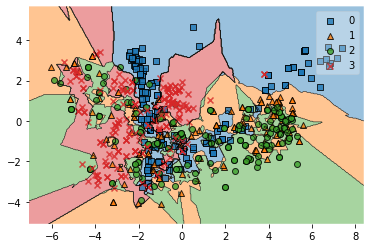

In [67]:
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
plot_decision_regions(x_train_pca, y_train, clf)

LR score: 0.3941176470588235


/store/lribeiro/.local/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


<AxesSubplot:>

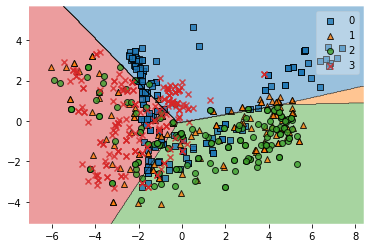

In [69]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train_pca, y_train)
print(f"LR score: {clf.score(x_test_pca, y_test)}")

plot_decision_regions(x_train_pca, y_train, clf)

5 - Faça a classificação dos dados gerados artificialmente com o código abaixo. Compare os resultados para os métodos k-vizinhos, regressão logística e naive Bayes.

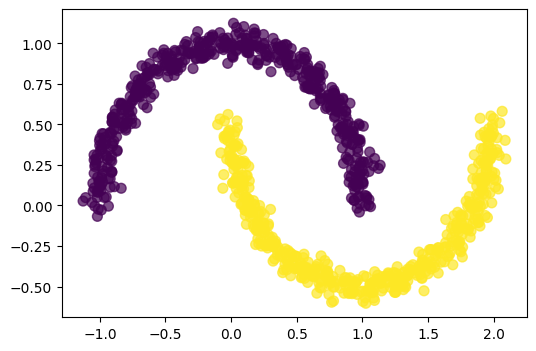

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

6- Encontre a região de separação dos dados do exercício anterior.

7 -  Estude o método gridsearch e verifique como usar na regressão logística.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

# separar validação e treino
idx = np.random.randint(len(X), size=len(X))
n_train = int(len(X)*0.8)
x_train, y_train = X[idx[:n_train]], y[idx[:n_train]]
x_test, y_test = X[idx[n_train:]], y[idx[n_train:]]

In [5]:
# normalização
mean, std = x_train.mean(axis=0), x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf, param_grid={"n_neighbors": [1, 3, 5, 7]})
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7]})

In [7]:
grid_search.score(x_test, y_test)

1.0

In [8]:
grid_search.cv_results_

{'mean_fit_time': array([0.0008667 , 0.00077291, 0.00048842, 0.00053868]),
 'std_fit_time': array([3.98061432e-04, 1.75389847e-04, 1.58670027e-05, 5.90213078e-05]),
 'mean_score_time': array([0.00569363, 0.00607624, 0.00460668, 0.00501432]),
 'std_score_time': array([1.10274023e-03, 8.22860582e-04, 9.69432811e-05, 5.71575268e-04]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7}],
 'split0_test_score': array([1., 1., 1., 1.]),
 'split1_test_score': array([1., 1., 1., 1.]),
 'split2_test_score': array([1., 1., 1., 1.]),
 'split3_test_score': array([1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1.]),
 'mean_test_score': array([1., 1., 1., 1.]),
 'std_test_score': array([0., 0., 0., 0.]),
 'rank_test_score': array([1, 1, 1, 1], dtype=int32)}

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV


# separar validação e treino
idx = np.random.randint(len(X), size=len(X))
n_train = int(len(X)*0.8)
x_train, y_train = X[idx[:n_train]], y[idx[:n_train]]
x_test, y_test = X[idx[n_train:]], y[idx[n_train:]]

# normalização
mean, std = x_train.mean(axis=0), x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
grid_search = GridSearchCV(clf, param_grid={"penalty": ['l2', 'none'], 'solver': ['newton-cg', 'lbfgs']})
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs']})

In [14]:
grid_search.cv_results_

{'mean_fit_time': array([0.00343642, 0.00229106, 0.00461349, 0.00255542]),
 'std_fit_time': array([1.94802342e-04, 8.82749868e-05, 8.84206956e-04, 7.57850534e-04]),
 'mean_score_time': array([0.00021915, 0.00021749, 0.00026035, 0.00029016]),
 'std_score_time': array([2.00608515e-05, 8.27748654e-06, 4.43440611e-05, 1.34358124e-04]),
 'param_penalty': masked_array(data=['l2', 'l2', 'none', 'none'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'newton-cg', 'lbfgs'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'penalty': 'l2', 'solver': 'newton-cg'},
  {'penalty': 'l2', 'solver': 'lbfgs'},
  {'penalty': 'none', 'solver': 'newton-cg'},
  {'penalty': 'none', 'solver': 'lbfgs'}],
 'split0_test_score': array([0.90625, 0.90625, 0.90625, 0.90625]),
 'split1_test_score': array([0.86875, 0.86875, 0.86875, 0.86875]),


In [23]:
grid_search.score(x_test, y_test)

0.87

In [20]:
grid_search.predict(x_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0])

In [25]:
(grid_search.predict(x_test) == y_test)

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

In [26]:
(grid_search.predict(x_test) == y_test).mean()

0.87